# Question 1 codes and answers

In [1]:
import pandas as pd

# Load the model comparison data
model_compare_df = pd.read_csv('model_compare.csv')
model_compare_df['Margin%'] = model_compare_df['Margin%'].str.replace('%', '').astype(float)

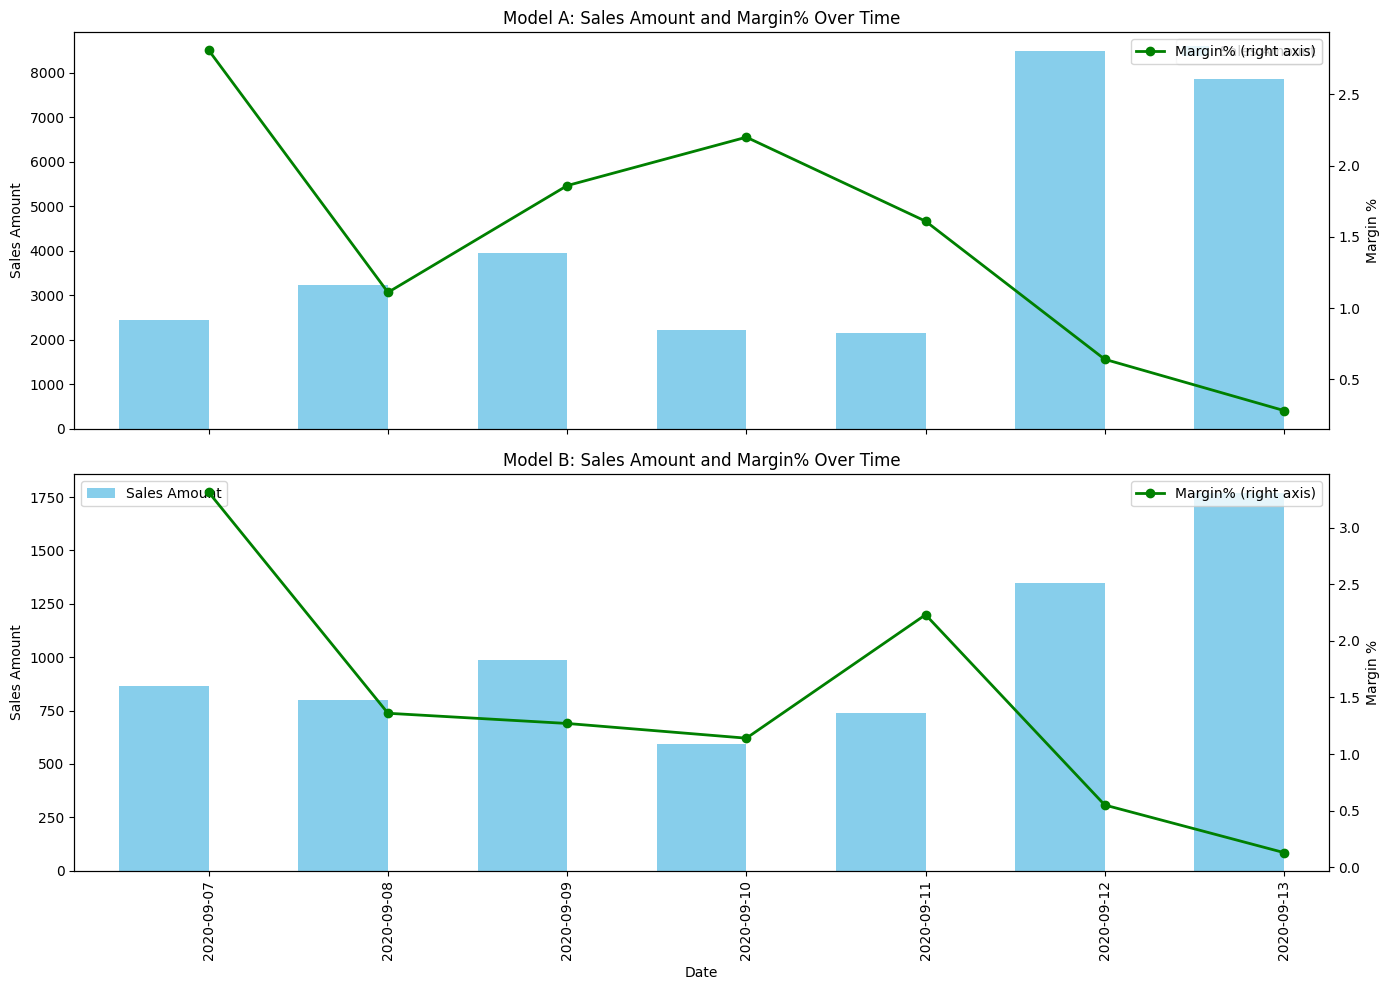

In [3]:
import matplotlib.pyplot as plt

# Separate the data for Model A and Model B
model_a_df = model_compare_df[model_compare_df['By'] == 'Model A']
model_b_df = model_compare_df[model_compare_df['By'] == 'Model B']

# Create subplots for Model A and Model B
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Function to plot the charts
def plot_model_data(ax, df, title):
    ax2 = ax.twinx()
    
    # Bar chart for Sales Amount
    df.plot(kind='bar', x='Date', y='Sales_Amount', ax=ax, color='skyblue', position=1, label='Sales Amount')
    
    # Line chart for Margin%
    df.plot(kind='line', x='Date', y='Margin%', marker='o', ax=ax2, color='green', linewidth=2, label='Margin% (right axis)')
    
    # Setting the labels and title
    ax.set_ylabel('Sales Amount')
    ax2.set_ylabel('Margin %')
    ax.set_title(title)

# Plot the data for Model A
plot_model_data(axes[0], model_a_df, 'Model A: Sales Amount and Margin% Over Time')

# Plot the data for Model B
plot_model_data(axes[1], model_b_df, 'Model B: Sales Amount and Margin% Over Time')

# Set the x-axis label
axes[1].set_xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()


There's a visible trend where the sales amount increases on certain days, which correspond to weekends, while the margin percentage tends to decrease on those days. This could indicate that while more sales are made on weekends, these sales are less profitable.

In [4]:
# Add the Sales_Per_Customer column to the original dataframe
model_compare_df['Sales_Per_Customer'] = model_compare_df['Sales_Amount'] / model_compare_df['Customer_Count']

# Show the updated dataframe with the new column
model_compare_df[['Date', 'By', 'Customer_Count', 'Sales_Amount', 'Net_amount', 'Sales_Per_Customer']]

,Date,By,Customer_Count,Sales_Amount,Net_amount,Sales_Per_Customer
0,2020-09-07,Model A,74,2448,68.80,33.081081
1,2020-09-08,Model A,92,3232,35.72,35.130435
2,2020-09-09,Model A,120,3948,73.29,32.900000
3,2020-09-10,Model A,63,2207,48.45,35.031746
4,2020-09-11,Model A,64,2155,34.68,33.671875
5,2020-09-12,Model A,265,8484,54.29,32.015094
6,2020-09-13,Model A,241,7857,22.37,32.601660
7,2020-09-07,Model B,29,863,28.54,29.758621
8,2020-09-08,Model B,25,800,10.88,32.000000
9,2020-09-09,Model B,29,986,12.56,34.000000


Both models display a relatively stable `Sales_Per_Customer` metric throughout the week, with the numbers varying within a narrow range for each model, suggesting consistency in the sales generated per customer for both Model A and Model B.

In [5]:
# Calculate the average margin for each model
average_margin = model_compare_df.groupby('By')['Margin%'].mean()

# Correcting column names for total sales and net amount calculations
total_sales = model_compare_df.groupby('By')['Sales_Amount'].sum()
total_net_amount = model_compare_df.groupby('By')['Net_amount'].sum()

# Calculate the total customer count for each model
total_customers = model_compare_df.groupby('By')['Customer_Count'].sum()

# Combine all the calculated metrics into a summary dataframe
summary_df = pd.DataFrame({
    'Average Margin (%)': average_margin,
    'Total Sales Amount': total_sales,
    'Total Net Amount': total_net_amount,
    'Total Customers': total_customers
})

# Calculate the variance of the margin for each model to see which one has more consistent performance.
margin_variance = model_compare_df.groupby('By')['Margin%'].var()
summary_df['Margin Variance'] = margin_variance

summary_df


,Average Margin (%),Total Sales Amount,Total Net Amount,Total Customers,Margin Variance
By,,,,,
Model A,1.501429,30331,337.60,919,0.787981
Model B,1.427143,7097,84.88,219,1.125557


In [6]:
# Create a pivot table with dates as rows and models as columns for the margin.
pivot_margins = model_compare_df.pivot(index='Date', columns='By', values='Margin%')

# Calculate the correlation between Model A and Model B's daily margins
correlation_between_models = pivot_margins.corr()

# Since we only have two models, the result will be a 2x2 matrix, we are interested in the off-diagonal value.
correlation_between_models_value = correlation_between_models.iloc[0, 1]

correlation_between_models_value

0.8247525232172935

## Model A vs Model B Performance Summary

### Overview
- **Model A** has demonstrated a higher engagement and revenue generation compared to Model B within the testing period:
  - Average Margin: **1.50%**
  - Total Sales Amount: **30,331**
  - Total Net Amount: **337.60**
  - Total Customers: **919**

- **Model B** has shown a slightly lower average margin but not significantly different from Model A:
  - Average Margin: **1.43%**
  - Total Sales Amount: **7,097**
  - Total Net Amount: **84.88**
  - Total Customers: **219**

### Consistency and Variability
- Model A has a lower margin variance (**0.788%**) indicating more consistent performance.
- Model B has a higher margin variance (**1.126%**) suggesting greater variability in its performance.

### Correlation Analysis
- There is a strong positive correlation between the daily margins of Model A and Model B (**~0.825**), suggesting that both models tend to perform similarly across the tested dates, responding to market conditions or customer behaviors in a comparable manner.

### Conclusion
Given the above analysis, **Model A** is the preferred choice due to:
- Higher overall sales and net amounts indicating a broader appeal or effectiveness.
- A larger customer base, which could be indicative of better market penetration.
- More consistent performance with lower variability in margins.
- A strong correlation in performance with Model B suggests that choosing Model A does not forgo the benefits observed in Model B, especially given Model A's higher engagement metrics.

### Decision Factors
The choice to recommend Model A is supported by its robust performance across multiple metrics. However, it's worth considering operational factors such as costs, scalability, and implementation ease before finalizing the decision. As external factors influence both models similarly, the priority would be to ensure that Model A aligns with the strategic goals and operational capabilities of the business.
